In [1]:
import pandas as pd
import nltk
import sklearn
import textblob
from textblob import TextBlob
import matplotlib
import seaborn

In [2]:
dataset=pd.read_csv("D:/psychatric symptom detection data/tweetss.csv",encoding="latin-1")

In [3]:
dataset.head()

,tweets,Sex,symptom,type,Level
0,Do You Think You Might Be Going Insane Again?,1,1,1,Severe
1,The Day My Heart Broke  Part Two,1,1,3,Severe
2,New #blog post alert! I discuss depression and...,1,1,3,Severe
3,Bipolar Disorder  My Super Power,1,1,2,Severe
4,Finally its Christmas drink season @starbucks...,1,0,0,None


In [ ]:
dataset['tweets']

In [4]:
dataset['tweets']=dataset.tweets.astype(str)

In [5]:
dataset['polarity']=dataset['tweets'].apply(lambda tweet:TextBlob(tweet).sentiment.polarity)

In [6]:
dataset['subjectivity']=dataset['tweets'].apply(lambda tweet:TextBlob(tweet).sentiment.subjectivity)


In [7]:
dataset.head()

,tweets,Sex,symptom,type,Level,polarity,subjectivity
0,Do You Think You Might Be Going Insane Again?,1,1,1,Severe,-1.000000,1.000000
1,The Day My Heart Broke  Part Two,1,1,3,Severe,0.000000,0.000000
2,New #blog post alert! I discuss depression and...,1,1,3,Severe,-0.132792,0.622078
3,Bipolar Disorder  My Super Power,1,1,2,Severe,0.333333,0.666667
4,Finally its Christmas drink season @starbucks...,1,0,0,None,0.000000,1.000000


In [8]:
#import dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
matplotlib.style.use('ggplot')
from subprocess import check_output
from nltk.tokenize import ToktokTokenizer
toktok=ToktokTokenizer()

In [9]:
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
df=dataset
df.head()
df.tail()

,tweets,Sex,symptom,type,Level,polarity,subjectivity
3994,I guess I'm gonna travel. Just fearful (very f...,1,1,2,Severe,-0.680000,0.773333
3995,RT @halsey : No jokes right now. I have dedica...,1,1,2,Severe,0.142857,0.417857
3996,Do yourselves a favor... dont EVER date a per...,1,1,2,Severe,0.468750,0.800000
3997,"@LCNSB_ I'm sorry, because I suffer from sever...",1,1,2,Severe,-0.400000,0.638889
3998,RT @StrugglingAnon_ : Honestly I am so fucking...,1,1,2,Highly severe,0.200000,0.500000


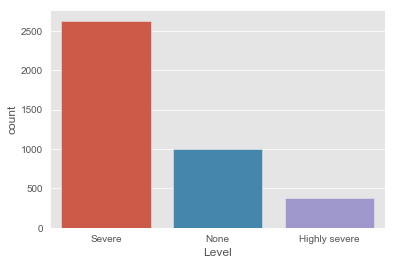

In [11]:
# Value Count 
sns.countplot(df['Level'])

In [14]:
import re
def initial_clean(tweets):
    
    tweets=re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))|((\S+)?(\@)(\S+)?)"," ",tweets)
    tweets=re.sub("[^a-zA-Z]"," ",tweets)
    url = re.compile(r"([፥@#$%^&=?×!,;:_.(){}`'+*<>\"¤—„\® ̄™¡¡\x10»€«·‘0e1b§”¬¦...""f÷\~ ̈©±¥£¶–°• ̃’“|])")
    tweets = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
tweets=tweets.lower()
tweets=nltk.word_tokenize(tweets)
    return tweets
stemmer=PorterStemmer()
def stem_words(tweets):  
    try:
        tweets=[stemmer.stem(word) for word in tweets]
        tweets=[word for word in tweets if len(word)>1] 
    except IndexError:
        pass
    return tweets
def apply_all(tweets):
    
    return stem_words(initial_clean(tweets))


In [15]:
#clean message and tweets and create new column 'tokenized'
import time
t1=time.time()
df['tokenized']=df['tweets'].apply(apply_all) + df['tweets'].apply(apply_all)
t2=time.time()
print("Time to clean and tokenize",len(df),"articles: ",(t2-t1)/60,"min")


Time to clean and tokenize 3999 articles:  0.40398083527882894 min


In [16]:
#df.head()
lst=[]
for i in range(0,len(df)):
    x=df['tokenized'][i]
    ap=" ".join(x)
#for xx in x:
#    ap="".join(xx)
    lst.append(ap)
print(lst[1])

the day my heart broke part two the day my heart broke part two


In [17]:
df['list']=lst

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
len(df)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(n,n))
x_feature = vectorizer.fit_transform(lst).toarray()


In [19]:
x=pd.DataFrame(x_feature)
k=df[['Sex','polarity','subjectivity','symptom','type']]
p=pd.DataFrame(k)
X=pd.concat([x,p],axis=1)
X
y=df[['Level']]

,0,1,2,3,4,5,6,7,8,9,...,5110,5111,5112,5113,5114,Sex,polarity,subjectivity,symptom,type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,-1.000000,1.000000,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.000000,0.000000,1,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,-0.132792,0.622078,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.333333,0.666667,1,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.000000,1.000000,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.000000,0.000000,1,2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.400000,0.450000,1,2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.000000,0.000000,1,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.200000,0.300000,1,1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.000000,0.000000,1,2


In [20]:
y=df[['Level']]

In [21]:
from imblearn.over_sampling import SMOTE

C:\Users\Merry\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Merry\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Merry\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [22]:
oversample = SMOTE(random_state=42)
X_r,y_r=oversample.fit_resample(X,y)

C:\Users\Merry\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Merry\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Merry\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [23]:
X_r.shape,y_r.shape

((7887, 5120), (7887,))

In [24]:
from collections import Counter
counter=Counter(y_r)
for k,v in counter.items():
    dist=v/len(y_r)*100
    print(f"class={k},n={v},({dist}%)")

class=Severe,n=2629,(33.33333333333333%)
class=None,n=2629,(33.33333333333333%)
class=Highly severe,n=2629,(33.33333333333333%)


In [25]:
# Split Data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_r,y_r,test_size=0.2,random_state=42)

In [26]:
X.shape,y.shape
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6309, 5120), (6309,), (1578, 5120), (1578,))

In [27]:
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [28]:
from sklearn import metrics
import numpy as np
import itertools

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Number of documents = 6309  |  Number of features = 5120
Accuracy of LogisticRegression  classifier on training set: 1.00
Accuracy of LogisticRegression classifier on test set: 0.99
accuracy:   0.989
Confusion matrix, without normalization


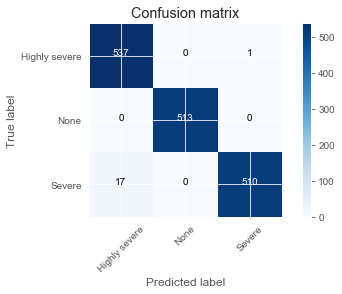

In [30]:
from sklearn.linear_model import  LogisticRegression
logreg=LogisticRegression(C=1e5, max_iter=10000 )
print('Number of documents = {}  |  Number of features = {}'.format(X_train.shape[0], X_train.shape[1]))
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of LogisticRegression  classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Highly severe', 'None','Severe'])

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

               precision    recall  f1-score   support

Highly severe       0.97      1.00      0.98       538
         None       1.00      1.00      1.00       513
       Severe       1.00      0.97      0.98       527

     accuracy                           0.99      1578
    macro avg       0.99      0.99      0.99      1578
 weighted avg       0.99      0.99      0.99      1578



Accuracy of support vector machine   classifier on training set: 1.00
Accuracy of support vector machine classifier on test set: 0.99
accuracy:   0.964
Confusion matrix, without normalization


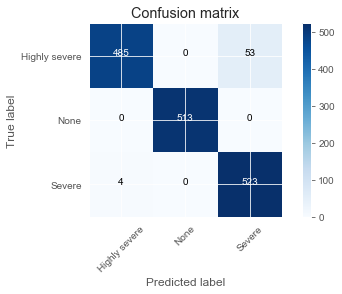

In [32]:
from sklearn.svm import LinearSVC
svmmodel_w2v= LinearSVC(C=0.01, multi_class='ovr', max_iter=10000, 
                        class_weight='balanced',penalty='l2' )
svmmodel_w2v=svmmodel_w2v.fit(X_train, y_train)
pred = svmmodel_w2v.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of support vector machine   classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of support vector machine classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Highly severe', 'None','Severe'])

In [33]:
print(classification_report(y_test, pred))

               precision    recall  f1-score   support

Highly severe       0.99      0.90      0.94       538
         None       1.00      1.00      1.00       513
       Severe       0.91      0.99      0.95       527

     accuracy                           0.96      1578
    macro avg       0.97      0.96      0.96      1578
 weighted avg       0.97      0.96      0.96      1578



Accuracy of RandomForest  classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 0.99
accuracy:   0.990
Confusion matrix, without normalization


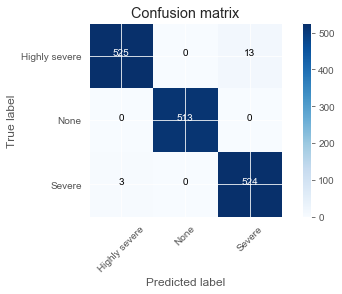

In [34]:
from sklearn.ensemble import RandomForestClassifier
Random=RandomForestClassifier(n_estimators=400, n_jobs=4)
Random.fit(X_train, y_train)
pred = Random.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of RandomForest  classifier on training set: {:.2f}'
     .format(Random.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(Random.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)

plot_confusion_matrix(cm, classes=['Highly severe', 'None','Severe'])

In [ ]:
print(classification_report(y_test, pred))

Number of documents = 6309  |  Number of features = 5120
Total time: 9.48s
accuracy: 0.9220532319391636
0.9220532319391636
Confusion matrix, without normalization


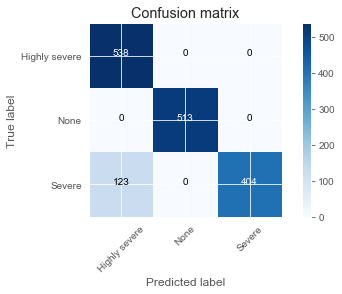

In [37]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
nb_model = GaussianNB()
print('Number of documents = {}  |  Number of features = {}'.format(X_train.shape[0], X_train.shape[1]))
st_time = time.time()
nb_model.fit(X_train,y_train)
pred = nb_model.predict(X_test)
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))
score = metrics.accuracy_score(y_test, pred)
print('accuracy: {}'.format(score))
print('='*100)
print(score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm,classes=['Highly severe', 'None','Severe'])

In [38]:
print(classification_report(y_test, pred))

               precision    recall  f1-score   support

Highly severe       0.81      1.00      0.90       538
         None       1.00      1.00      1.00       513
       Severe       1.00      0.77      0.87       527

     accuracy                           0.92      1578
    macro avg       0.94      0.92      0.92      1578
 weighted avg       0.94      0.92      0.92      1578

